<a href="https://colab.research.google.com/github/spanddhana-sara/Enron-Email-Classification/blob/main/Enron_Email_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Downloading data from the website
!wget http://bailando.sims.berkeley.edu/enron/enron_with_categories.tar.gz
!tar zxf enron_with_categories.tar.gz
!rm enron_with_categories.tar.gz

--2023-03-01 09:17:17--  http://bailando.sims.berkeley.edu/enron/enron_with_categories.tar.gz
Resolving bailando.sims.berkeley.edu (bailando.sims.berkeley.edu)... 128.32.78.19
Connecting to bailando.sims.berkeley.edu (bailando.sims.berkeley.edu)|128.32.78.19|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://bailando.berkeley.edu/enron/enron_with_categories.tar.gz [following]
--2023-03-01 09:17:17--  https://bailando.berkeley.edu/enron/enron_with_categories.tar.gz
Resolving bailando.berkeley.edu (bailando.berkeley.edu)... 128.32.78.19
Connecting to bailando.berkeley.edu (bailando.berkeley.edu)|128.32.78.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4523350 (4.3M) [application/x-gzip]
Saving to: ‘enron_with_categories.tar.gz’

enron_with_categori 100%[===================>]   4.31M  28.3MB/s    in 0.2s    

2023-03-01 09:17:17 (28.3 MB/s) - ‘enron_with_categories.tar.gz’ saved [4523350/4523350]



In [2]:
#Importing Libraries
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing import pad_sequences
from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers
from keras import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization
#from keras.optimizers import adam
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

# For custom metrics
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping 


import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

plt.style.use('seaborn')

import seaborn as sns
from IPython.display import Image

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import gensim
import os

sns.set_style("whitegrid")
np.random.seed(0)
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
#import plotly.plotly as py
#import plotly.graph_objs as go
import plotly
import chart_studio
chart_studio.tools.set_credentials_file(username='hamzasharoon', api_key='9le0c8M5GUNRAKyJoIt2')


# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Double check with Python 3


In [3]:
import email
import glob
import time
import math
from collections import defaultdict, namedtuple
from string import punctuation

import matplotlib.pyplot as plt
import nltk
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from imblearn.over_sampling import SMOTE
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier


# category label 
LABEL_CAT = 1
NUM_WORDS = 500
# ALLOWED_SUBLABELS = []
ALLOWED_SUBLABELS = [1, 2, 3, 5, 6]

nltk.download('punkt')
nltk.download('stopwords')

stoplist = set(stopwords.words('english') + list(punctuation))
stemmer = PorterStemmer()



# http://bailando.sims.berkeley.edu/enron/enron_categories.txt
idx_to_cat = {
    1: 'Company Business, Strategy, etc.)',
    2: 'Purely Personal',
    3: 'Personal but in professional context (e.g., it was good working with you)',
    4: 'Logistic Arrangements (meeting scheduling, technical support, etc)',
    5: 'Employment arrangements (job seeking, hiring, recommendations, etc)',
    6: 'Document editing/checking (collaboration)',
    # 7: 'Empty message (due to missing attachment)',
    # 8: 'Empty message'
    }


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import pandas as pd
import os


In [5]:
LABEL_CAT = 1  # we'll be using the 2nd-level category "Primary topics"
ALLOWED_SUBLABELS = [1, 2, 3, 4, 5, 6]  # only allow these 3rd-level categories

def get_labels(filename):
    with open(filename + '.cats') as f:
        labels = defaultdict(dict)
        line = f.readline()
        while line:
            line = line.split(',')
            top_cat, sub_cat, freq = int(line[0]), int(line[1]), int(line[2])
            labels[top_cat][sub_cat] = freq
            line = f.readline()
            # print(labels)
    return dict(labels)

def check_category(filename, top_cat, sub_cat):
    labels = get_labels(filename)
    if sub_cat in labels[top_cat]:
        return 1
    return 0

def get_binary_labels(filenames, top_cat, sub_cat):
    flags = []
    for filename in filenames:
        flags.append(check_category(filename, top_cat, sub_cat))
    return flags
     

Streaming output truncated to the last 5000 lines.
3101
{1: {1: 2}, 2: {4: 2}, 3: {3: 1}}
3103
3105
3106
{1: {1: 2}, 2: {1: 2, 2: 2}, 3: {3: 2}}
3108
3110
3112
3114
{1: {1: 1, 6: 1}, 3: {2: 1, 6: 1}, 4: {10: 1}}
3115
3116
3117
3118
3119
{1: {1: 1}, 2: {9: 1}, 3: {7: 1}}
3120
3121
3122
{1: {1: 2}, 3: {5: 2}, 4: {15: 2}}
3124
3126
3128
{1: {1: 2}, 2: {13: 1}, 3: {2: 2, 4: 2, 6: 2}}
3130
3131
3133
3135
3137
{1: {1: 2}, 2: {1: 2, 2: 2, 13: 2}, 3: {8: 2}}
3139
3141
3143
3145
3147
{1: {1: 2}, 2: {2: 2, 13: 1}, 3: {7: 2}}
3149
3151
3152
3154
{1: {1: 2}, 2: {4: 2}, 3: {3: 2, 6: 1}}
3156
3158
3160
3161
{1: {1: 2, 4: 2}, 2: {1: 2, 2: 2}, 3: {2: 2}}
3163
3165
3167
3169
3171
{1: {1: 2}, 3: {5: 1, 6: 2}, 4: {12: 1}}
3173
3174
3176
3177
{1: {1: 2}, 3: {3: 2}}
3179
3181
{1: {1: 2, 6: 2}, 2: {1: 2, 2: 2, 13: 2}, 3: {5: 2}}
3183
3185
3187
3189
3191
3193
{1: {1: 2}, 2: {9: 2}, 3: {7: 2, 10: 1}}
3195
3197
3199
3200
{1: {1: 2}, 2: {6: 2, 13: 2}, 3: {1: 1, 6: 2}}
3202
3204
3206
3207
3209
{1: {1: 1}, 2: {1:

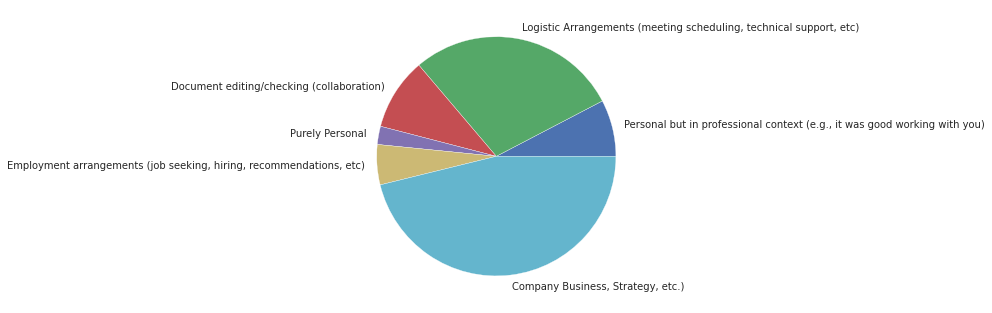

In [6]:
email_files = [f.replace('.cats', '') for f in glob.glob('enron_with_categories/*/*.cats')]
category_cnt = defaultdict(int)
total_freq = 0
label_freq = 0
labeled_files = []

for email_file in email_files:
    labels = get_labels(email_file)
    print(labels)
    for top_cat in labels:
        for sub_cat in labels[top_cat]:
            total_freq += labels[top_cat][sub_cat]
            print(total_freq)

    if LABEL_CAT in labels:
        has_label = False
        for sub_cat in labels[LABEL_CAT]:
            if ALLOWED_SUBLABELS and sub_cat not in ALLOWED_SUBLABELS:
                continue
            freq = labels[LABEL_CAT][sub_cat]
            category_cnt[sub_cat] += freq
            label_freq += freq
            has_label = True
        if has_label:
            labeled_files.append(email_file)

print('Labels account for {0:.1f}% (or {1:d} of {2:d}) of category ratings.'.
      format((100.0*label_freq/total_freq), label_freq, total_freq))
for idx in category_cnt.keys():
    print(' > {0}: {1:d}'.format(idx_to_cat[idx], category_cnt[idx]))

plt.figure()
ax = plt.subplot(111)
ax.pie([category_cnt[i] for i in category_cnt.keys()],
       labels=[idx_to_cat[i] for i in category_cnt.keys()])
plt.show()

**Data Preprocessing**

In [7]:
word_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

from nltk.tokenize import TweetTokenizer



def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

def preprocess(filename):
    with open(filename) as f:
        message = email.message_from_file(f)
    
    words = []
    message_count = 1
    include_text = True
    for line in message.get_payload().split('\n'):
        clean_line = clean_text(line)

        # exclude forwarded information
        if ('forwarded' in clean_line.lower() or 'original' in clean_line.lower()) and '--' in line:
            message_count += 1
            include_text = False
        if include_text:
            words.extend([stemmer.stem(word) for word in word_tokenize(clean_line)]) ##Stemming
            words.extend([lemmatizer.lemmatize(word) for word in word_tokenizer.tokenize(clean_line)]) ### Lemmatizing
            

    
    tos = [address.strip() for address in (message['To'] or '').split(',')]
    froms = [address.strip() for address in (message['From'] or '').split(',')]
    
    return [word for word in words if word not in stoplist], tos, froms, [message_count]

filename = email_files[4]+'.txt'

print('--- ORIGINAL TEXT ---')
with open(filename) as f:
    print(f.read())

print('')

print('--- PREPROCESSED TEXT ---')
m, tos, froms, message_count = preprocess(filename)
print(m)
print(tos)
print(froms)
print(message_count)

--- ORIGINAL TEXT ---
Message-ID: <4232844.1075860516484.JavaMail.evans@thyme>
Date: Tue, 1 Feb 2000 01:43:00 -0800 (PST)
From: mary.hain@enron.com
To: richard.sanders@enron.com, christian.yoder@enron.com, ellen@tca-us.com
Subject: confidential (client-attorney)
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Mary Hain
X-To: Richard Sanders, Christian Yoder, ellen@tca-us.com
X-cc: 
X-bcc: 
X-Folder: \Richard_Sanders_Dec2000\Notes Folders\All documents
X-Origin: Sanders-R
X-FileName: rsander.nsf

---------------------- Forwarded by Mary Hain/HOU/ECT on 02/01/2000 09:47 AM 
---------------------------
From: Cooper Richey on 02/01/2000 09:18 AM
To: Mary Hain/HOU/ECT@ECT
cc:  
Subject: confidential (client-attorney)

revised excel workbook is attached



please forward to Ellen B.  

Ellen - I added the statistic you wanted and updated the older ones (you'll 
notice
slightly different prices/occurrences because I hadn't cut off the date 

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
dct = Dictionary() 
addrDict = Dictionary()

new_labeled_files = []

for email_file in labeled_files:
    content, tos, froms, _ = preprocess(email_file + '.txt')
    if content:
        dct.add_documents([content])
        addrDict.add_documents([tos, froms])
        new_labeled_files.append(email_file)

labeled_files = new_labeled_files 

dct.filter_extremes(no_below=1, no_above=0.5, keep_n=NUM_WORDS)

In [11]:
def get_bows(filenames):
    bows = []
    one_hot_sentences = []
    all_tos = []
    all_froms = []
    all_message_counts = []
    for filename in filenames:
        # get content and all metadata
        content, tos, froms, message_count = preprocess(filename + '.txt')

        # one-hot encode to addresses
        tos = addrDict.doc2bow(tos)
        one_hot_tos = np.zeros(len(addrDict.items()))
        for t in tos:
            one_hot_tos[t[0]] = t[1]
        all_tos.append(one_hot_tos)

        # one-hot encode from addresses
        froms = addrDict.doc2bow(froms)
        one_hot_froms = np.zeros(len(addrDict.items()))
        for f in froms:
            one_hot_froms[f[0]] = f[1]
        all_froms.append(one_hot_froms)

        # one-hot-encode sentences
        one_hot_sentence = []
        idxs = dct.doc2idx(content)
        for idx in idxs:
            if idx == -1:
                continue
            one_hot_word = np.zeros(NUM_WORDS)
            one_hot_word[idx] = 1
            one_hot_sentence.append(one_hot_word)
        
        # create bag of words representation for sentences
        bow = dct.doc2bow(content)
        features = np.zeros(NUM_WORDS)
        for word in bow:
            features[word[0]] = word[1] if word[1] else 0
        
        bows.append(features)
        one_hot_sentences.append(one_hot_sentence)
        all_message_counts.append(message_count)
    return bows, one_hot_sentences, all_tos, all_froms, all_message_counts

bows, one_hot_sentences, all_tos, all_froms, all_message_counts = get_bows(labeled_files)
     

In [12]:
email_labels = []
for email_file in labeled_files:
    email_labels.append(tuple(set(get_labels(email_file)[LABEL_CAT].keys()).intersection(set(ALLOWED_SUBLABELS))))

multilabel_binarizer = MultiLabelBinarizer()
y1 = multilabel_binarizer.fit_transform(email_labels)


In [13]:
y1

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]])

In [14]:
arr_1d = y1.ravel()
unique, counts = np.unique(arr_1d, return_counts=True)
for i in range(len(unique)):
    print("Frequency of ", unique[i], " is ", counts[i])


Frequency of  0  is  7053
Frequency of  1  is  1611


In [15]:
y1.shape

(1444, 6)

In [16]:
def print_ndarray(arr):
    if arr.size == 1:
        print(arr[0])
    else:
        for i in range(arr.shape[0]):
            print_ndarray(arr[i])


In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [18]:
word_count = NUM_WORDS
to_from_count = len(all_tos[0]) + len(all_froms[0])

Model = namedtuple('Model', ['name', 'instance'])
Result = namedtuple('Result', ['smote', 'to_from', 'message_count', 'model_name', 'f1_score', 'accuracy_score', 'precision_score'])

results = []
all_models = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
for config in [{'to_from': False, 'message_count': False, 'smote': False},
               {'to_from': True, 'message_count': False, 'smote': False},
               {'to_from': False, 'message_count': True, 'smote': False},
               {'to_from': True, 'message_count': True, 'smote': False},
               {'to_from': False, 'message_count': False, 'smote': True},
               {'to_from': True, 'message_count': False, 'smote': True},
               {'to_from': False, 'message_count': True, 'smote': True},
               {'to_from': True, 'message_count': True, 'smote': True}]:
    print('Include To/From:', config['to_from'])
    print('Include Message Count:', config['message_count'])
    models = [Model(name='Logistic Regression',
                    instance=OneVsRestClassifier(LogisticRegression(multi_class='ovr', solver='lbfgs'))),
              Model(name='Decision Tree',
                    instance=DecisionTreeClassifier()),
              Model(name='Random Forest',
                    instance=RandomForestClassifier(n_estimators=100)),
    ]

x = []
for bow, tos, froms, message_count in zip(bows, all_tos, all_froms, all_message_counts):
    current = list(bow)
    if config['to_from']:
        current += list(tos + froms)
    if config['message_count']:
        current += list(message_count)
    x.append(current)

Include To/From: False
Include Message Count: False
Include To/From: True
Include Message Count: False
Include To/From: False
Include Message Count: True
Include To/From: True
Include Message Count: True
Include To/From: False
Include Message Count: False
Include To/From: True
Include Message Count: False
Include To/From: False
Include Message Count: True
Include To/From: True
Include Message Count: True


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.20, random_state=9000)

In [20]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss



**Classification Algorithms**

In [31]:
# Initialize a multi-output Logistic Regression
clf = OneVsRestClassifier(LogisticRegression(multi_class='ovr', solver='lbfgs'))

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
t_acc = accuracy_score(y_train,y_train_pred)
L = log_loss(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print("Loss: {:.2f}".format(L))
print("Training Accuracy: {:.2f}".format(t_acc))



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy: 0.44
Loss: 13.19
Training Accuracy: 0.83


In [32]:
# Generate a classification 
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       141
           1       0.00      0.00      0.00        10
           2       0.32      0.31      0.32        29
           3       0.71      0.60      0.65        92
           4       0.36      0.21      0.27        19
           5       0.52      0.30      0.38        37

   micro avg       0.61      0.54      0.57       328
   macro avg       0.43      0.35      0.38       328
weighted avg       0.59      0.54      0.56       328
 samples avg       0.56      0.55      0.54       328



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.metrics import multilabel_confusion_matrix

# assuming y_true and y_pred are the true labels and predicted labels, respectively
cm = multilabel_confusion_matrix(y_test, y_pred)

print(cm)


[[[ 98  50]
  [ 44  97]]

 [[277   2]
  [ 10   0]]

 [[241  19]
  [ 20   9]]

 [[174  23]
  [ 37  55]]

 [[263   7]
  [ 15   4]]

 [[242  10]
  [ 26  11]]]


In [34]:
# Initialize a multi-output K-Nearest Neighbors classifier
clf = MultiOutputClassifier(KNeighborsClassifier())

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
L = log_loss(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print("Loss: {:.2f}".format(L))
print("Training Accuracy: {:.2f}".format(t_acc))

Accuracy: 0.41
Loss: 14.78
Training Accuracy: 0.83


In [35]:
# Generate a classification 
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.73      0.49      0.59       141
           1       0.00      0.00      0.00        10
           2       0.29      0.17      0.22        29
           3       0.49      0.73      0.59        92
           4       0.00      0.00      0.00        19
           5       0.69      0.24      0.36        37

   micro avg       0.58      0.46      0.51       328
   macro avg       0.37      0.27      0.29       328
weighted avg       0.56      0.46      0.48       328
 samples avg       0.49      0.47      0.47       328



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:


# assuming y_true and y_pred are the true labels and predicted labels, respectively
cm = multilabel_confusion_matrix(y_test, y_pred)

print(cm)


[[[123  25]
  [ 72  69]]

 [[279   0]
  [ 10   0]]

 [[248  12]
  [ 24   5]]

 [[128  69]
  [ 25  67]]

 [[270   0]
  [ 19   0]]

 [[248   4]
  [ 28   9]]]


In [37]:
# Initialize a multi-output Random Forest classifier
clf = MultiOutputClassifier(RandomForestClassifier(n_estimators=100))

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
L = log_loss(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print("Loss: {:.2f}".format(L))
print("Training Accuracy: {:.2f}".format(t_acc))

Accuracy: 0.46
Loss: 11.74
Training Accuracy: 0.83


In [38]:
# Generate a classification 
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       141
           1       0.00      0.00      0.00        10
           2       0.39      0.24      0.30        29
           3       0.74      0.49      0.59        92
           4       0.67      0.11      0.18        19
           5       0.62      0.22      0.32        37

   micro avg       0.67      0.50      0.57       328
   macro avg       0.52      0.29      0.35       328
weighted avg       0.64      0.50      0.54       328
 samples avg       0.54      0.52      0.52       328



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:


# assuming y_true and y_pred are the true labels and predicted labels, respectively
cm = multilabel_confusion_matrix(y_test, y_pred)

print(cm)


[[[102  46]
  [ 40 101]]

 [[279   0]
  [ 10   0]]

 [[249  11]
  [ 22   7]]

 [[181  16]
  [ 47  45]]

 [[269   1]
  [ 17   2]]

 [[247   5]
  [ 29   8]]]


In [44]:
# Initialize a multi-output MLPclassifier
clf = MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(10,)))

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
L = log_loss(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print("Loss: {:.2f}".format(L))
print("Training Accuracy: {:.2f}".format(t_acc))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.49
Loss: 11.77
Training Accuracy: 0.83


In [45]:
# Generate a classification 
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       141
           1       0.00      0.00      0.00        10
           2       0.39      0.24      0.30        29
           3       0.66      0.64      0.65        92
           4       0.67      0.32      0.43        19
           5       0.55      0.32      0.41        37

   micro avg       0.66      0.56      0.61       328
   macro avg       0.50      0.37      0.42       328
weighted avg       0.63      0.56      0.58       328
 samples avg       0.58      0.57      0.57       328



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
from sklearn.metrics import multilabel_confusion_matrix

# assuming y_true and y_pred are the true labels and predicted labels, respectively
cm = multilabel_confusion_matrix(y_test, y_pred)

print(cm)


[[[107  41]
  [ 41 100]]

 [[279   0]
  [ 10   0]]

 [[249  11]
  [ 22   7]]

 [[167  30]
  [ 33  59]]

 [[267   3]
  [ 13   6]]

 [[242  10]
  [ 25  12]]]


**LSTM**

In [47]:


VOCAB_SIZE = NUM_WORDS
TOPIC_SIZE = len(ALLOWED_SUBLABELS)

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, output_size)

    def forward(self, i):
        output, _ = self.lstm(i)
        output = output[-1,:]
        output = self.l2(output)
        return output

n_hidden = 128
model = LSTM(VOCAB_SIZE, n_hidden, TOPIC_SIZE)

In [51]:
print_every = 1000
plot_every = 500

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

# Keep track of losses for plotting
current_loss = 0
all_losses = []

lr = 0.005
n_epochs = 5

pos_weight = torch.tensor([(516.0-w)/w for w in [96.0, 97.0, 56.0, 85.0, 125.0, 60.0]])
loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=lr, amsgrad=True)

start = time.time()

x_train, x_test, y_train, y_test = train_test_split(one_hot_sentences, multilabel_binarizer.fit_transform(email_labels), test_size=0.15, random_state=9000)
def get_random_training_example():
    idx = np.random.randint(0, len(x_train))
    e, category = x_train[idx], y_train[idx]
    if len(e) == 0:
        return get_random_training_example()
    return e, category

In [52]:
for epoch in range(1, n_epochs+1):
    model.train()
    e, category = get_random_training_example()
    y = torch.tensor(category).view(1, -1).float()
    x = torch.tensor(e).view(-1, 1, VOCAB_SIZE).float()

    yhat = model(x)
    yhat = yhat.view(1, -1)
    
    loss = loss_fn(yhat, y)
    loss_item = loss.item()
    current_loss += loss_item
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()

    # Print epoch number, loss, name and guess
    if epoch % print_every == 0:
        print('%d %d%% (%s) %.10f' % (epoch, epoch / n_epochs * 100, timeSince(start), loss_item))

    # Add current loss avg to list of losses
    if epoch % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

In [53]:
current_loss

5.145254969596863

**Converting the data to dataframe for easy visualization**

In [ ]:
l_files = labeled_files
append_str = '.txt'
prf = '/content/' 
# Append suffix / prefix to strings in list
pre_res = [prf+sub for sub in l_files]
suf_res = [sub+append_str for sub in pre_res]

 

In [ ]:

df.insert(0, column='Filename', value=suf_res)

In [ ]:
df = pd.DataFrame(y1, columns = ['Company Business, Strategy, etc.','Purely Personal','Personal but in professional context (e.g., it was good working with you)',
    'Logistic Arrangements (meeting scheduling, technical support, etc)',
  'Employment arrangements (job seeking, hiring, recommendations, etc)',
    'Document editing/checking (collaboration)'])


In [ ]:
import os
import csv
### Converting the .txt files in each folder to csv file


file_list = suf_res

csv_file = open('/content/labeled_files.csv', 'w')
csv_writer = csv.writer(csv_file)
for file_name in file_list:
    if file_name.endswith('.txt'):
        with open(file_name, 'r') as file:
            file_contents = file.read()
            csv_writer.writerow([file_name, file_contents])

csv_file.close()

In [ ]:
R = pd.read_csv('/content/labeled_files.csv')
R.columns = ['Filename', 'Message']

In [ ]:
result_5 = pd.merge(R, df, on = 'Filename', how = 'inner')

In [ ]:
## Helper functions
def get_text_from_email(msg, max_word_len=30):
    '''To get the content from email objects'''
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            payload = part.get_payload()
            payload = ' '.join(filter(lambda x: len(x) < max_word_len,  payload.split()))
            parts.append( payload )
    return ''.join(parts)

def split_email_addresses(line):
    '''To separate multiple email addresses'''
    if line:
        addrs = line.split(',')
        addrs = frozenset(map(lambda x: x.strip(), addrs))
    else:
        addrs = None
    return addrs

In [ ]:
# Parse the emails into a list email objects
messages = list(map(email.message_from_string, result_5['Message']))

# Get fields from parsed email objects
keys = messages[0].keys()
for key in keys:
    result_5[key] = [doc[key] for doc in messages]
# Parse content from emails
result_5['content'] = list(map(get_text_from_email, messages))
# Split multiple email addresses
result_5['From'] = result_5['From'].map(split_email_addresses)
result_5['To'] = result_5['To'].map(split_email_addresses)

# Extract the root of 'file' as 'user'
result_5['user'] = result_5['Filename'].map(lambda x:x.split('/')[0])

# cleanup
del messages
result_5.drop('Message', axis=1, inplace=True)

result_5.head()

,Filename,"Company Business, Strategy, etc.",Purely Personal,"Personal but in professional context (e.g., it was good working with you)","Logistic Arrangements (meeting scheduling, technical support, etc)","Employment arrangements (job seeking, hiring, recommendations, etc)",Document editing/checking (collaboration),Message-ID,Date,From,...,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
0,/content/enron_with_categories/6/173837.txt,0,0,0,0,0,1,<9688199.1075846160316.JavaMail.evans@thyme>,"Mon, 24 Jul 2000 11:26:00 -0700 (PDT)",(steven.kean@enron.com),...,7bit,Steven J Kean,Peggy Mahoney,,,\Steven_Kean_Dec2000_1\Notes Folders\All docum...,KEAN-S,skean.nsf,Looks good. Peggy Mahoney 07/24/2000 06:20 PM ...,
1,/content/enron_with_categories/6/175320.txt,0,0,0,0,0,1,<14103267.1075847587068.JavaMail.evans@thyme>,"Fri, 4 May 2001 09:14:00 -0700 (PDT)",(steven.kean@enron.com),...,7bit,Steven J Kean,Karen Moore,"Cindy Olson, Karen Denne, Michelle Cash, David...",,\Steven_Kean_June2001_1\Notes Folders\All docu...,KEAN-S,skean.nsf,I think the memo needs some additional work. I...,
2,/content/enron_with_categories/6/175275.txt,0,0,0,0,0,1,<19316738.1075847585161.JavaMail.evans@thyme>,"Thu, 10 May 2001 02:41:00 -0700 (PDT)",(steven.kean@enron.com),...,7bit,Steven J Kean,Nicholas O'Day,,,\Steven_Kean_June2001_1\Notes Folders\All docu...,KEAN-S,skean.nsf,The presentation looks fine but consider addin...,
3,/content/enron_with_categories/6/174175.txt,0,0,0,0,0,1,<18617596.1075846170274.JavaMail.evans@thyme>,"Thu, 24 Aug 2000 01:00:00 -0700 (PDT)",(steven.kean@enron.com),...,7bit,Steven J Kean,Cynthia Sandherr,,,\Steven_Kean_Dec2000_1\Notes Folders\All docum...,KEAN-S,skean.nsf,"I realize you have pushed these guys already, ...",
4,/content/enron_with_categories/6/176682.txt,0,0,0,0,0,1,<23863902.1075849875337.JavaMail.evans@thyme>,"Wed, 13 Jun 2001 01:12:00 -0700 (PDT)",(steven.kean@enron.com),...,7bit,Steven J Kean,Vance Meyer,Mark Palmer,,\Steven_Kean_Nov2001_1\Notes Folders\All docum...,KEAN-S,skean.nsf,Looks good; nice work. Let's get it out Vance ...,


In [ ]:
result = pd.concat([R, df], axis=1).reindex(df.index)
result

,Filename,Message,Filename,"Company Business, Strategy, etc.",Purely Personal,"Personal but in professional context (e.g., it was good working with you)","Logistic Arrangements (meeting scheduling, technical support, etc)","Employment arrangements (job seeking, hiring, recommendations, etc)",Document editing/checking (collaboration)
0,/content/enron_with_categories/6/173837.txt,Message-ID: <9688199.1075846160316.JavaMail.ev...,/content/enron_with_categories/6/174187.txt,0,0,0,0,0,1
1,/content/enron_with_categories/6/175320.txt,Message-ID: <14103267.1075847587068.JavaMail.e...,/content/enron_with_categories/6/173837.txt,0,0,0,0,0,1
2,/content/enron_with_categories/6/175275.txt,Message-ID: <19316738.1075847585161.JavaMail.e...,/content/enron_with_categories/6/175320.txt,0,0,0,0,0,1
3,/content/enron_with_categories/6/174175.txt,Message-ID: <18617596.1075846170274.JavaMail.e...,/content/enron_with_categories/6/175275.txt,0,0,0,0,0,1
4,/content/enron_with_categories/6/176682.txt,Message-ID: <23863902.1075849875337.JavaMail.e...,/content/enron_with_categories/6/174175.txt,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1439,/content/enron_with_categories/4/174196.txt,Message-ID: <2826460.1075846170848.JavaMail.ev...,/content/enron_with_categories/4/173907.txt,0,0,0,1,0,0
1440,/content/enron_with_categories/4/174510.txt,Message-ID: <30319550.1075846181889.JavaMail.e...,/content/enron_with_categories/4/174196.txt,0,0,0,1,0,0
1441,/content/enron_with_categories/4/174246.txt,Message-ID: <5800925.1075846172184.JavaMail.ev...,/content/enron_with_categories/4/174510.txt,0,0,0,1,0,0
1442,/content/enron_with_categories/4/173202.txt,Message-ID: <31197389.1075846141693.JavaMail.e...,/content/enron_with_categories/4/174246.txt,0,0,0,1,0,0


In [ ]:
list(result_5)

['Filename',
 'Company Business, Strategy, etc.',
 'Purely Personal',
 'Personal but in professional context (e.g., it was good working with you)',
 'Logistic Arrangements (meeting scheduling, technical support, etc)',
 'Employment arrangements (job seeking, hiring, recommendations, etc)',
 'Document editing/checking (collaboration)',
 'Message-ID',
 'Date',
 'From',
 'To',
 'Subject',
 'Mime-Version',
 'Content-Type',
 'Content-Transfer-Encoding',
 'X-From',
 'X-To',
 'X-cc',
 'X-bcc',
 'X-Folder',
 'X-Origin',
 'X-FileName',
 'content',
 'user']

In [ ]:
G = result_5.drop(columns= {'Filename','Message-ID',
 'Date',
 'From',
 'To', 'Mime-Version',
 'Content-Type',
 'Content-Transfer-Encoding',
 'X-From',
 'X-To',
 'X-cc',
 'X-bcc',
 'X-Folder',
 'X-Origin',
 'X-FileName','user'})
G.head(5)

,"Company Business, Strategy, etc.",Purely Personal,"Personal but in professional context (e.g., it was good working with you)","Logistic Arrangements (meeting scheduling, technical support, etc)","Employment arrangements (job seeking, hiring, recommendations, etc)",Document editing/checking (collaboration),Subject,content
0,0,0,0,0,0,1,Re: Rich Products,Looks good. Peggy Mahoney 07/24/2000 06:20 PM ...
1,0,0,0,0,0,1,Re: PRC MEMO from Skilling,I think the memo needs some additional work. I...
2,0,0,0,0,0,1,Re: Tokyo Presentation 15 May,The presentation looks fine but consider addin...
3,0,0,0,0,0,1,Re: MidAmerican Draft Documents,"I realize you have pushed these guys already, ..."
4,0,0,0,0,0,1,Re: Demonstration Procedure,Looks good; nice work. Let's get it out Vance ...


In [ ]:
len(G)

1443

In [ ]:
# G.to_csv('/content/Files_labeled.csv')


In [ ]:
## check for missing values
missing_values_check = G.isnull().sum()
print(missing_values_check)

Company Business, Strategy, etc.                                             0
Purely Personal                                                              0
Personal but in professional context (e.g., it was good working with you)    0
Logistic Arrangements (meeting scheduling, technical support, etc)           0
Employment arrangements (job seeking, hiring, recommendations, etc)          0
Document editing/checking (collaboration)                                    0
Subject                                                                      0
content                                                                      0
dtype: int64


In [ ]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = G.iloc[:,0:6].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(G))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(G)-clean_comments_count))

Total number of comments =  1443
Number of clean comments =  0
Number of comments with labels = 1443


In [ ]:
### find different categories
categories = list(G.columns.values)
categories = categories[0:6]
print(categories)

['Company Business, Strategy, etc.', 'Purely Personal', 'Personal but in professional context (e.g., it was good working with you)', 'Logistic Arrangements (meeting scheduling, technical support, etc)', 'Employment arrangements (job seeking, hiring, recommendations, etc)', 'Document editing/checking (collaboration)']


In [ ]:
# Calculating number of comments in each category
counts = []
for category in categories:
    counts.append((category, G[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,"Company Business, Strategy, etc.",740
1,Purely Personal,42
2,"Personal but in professional context (e.g., it...",136
3,"Logistic Arrangements (meeting scheduling, tec...",453
4,"Employment arrangements (job seeking, hiring, ...",88
5,Document editing/checking (collaboration),151


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


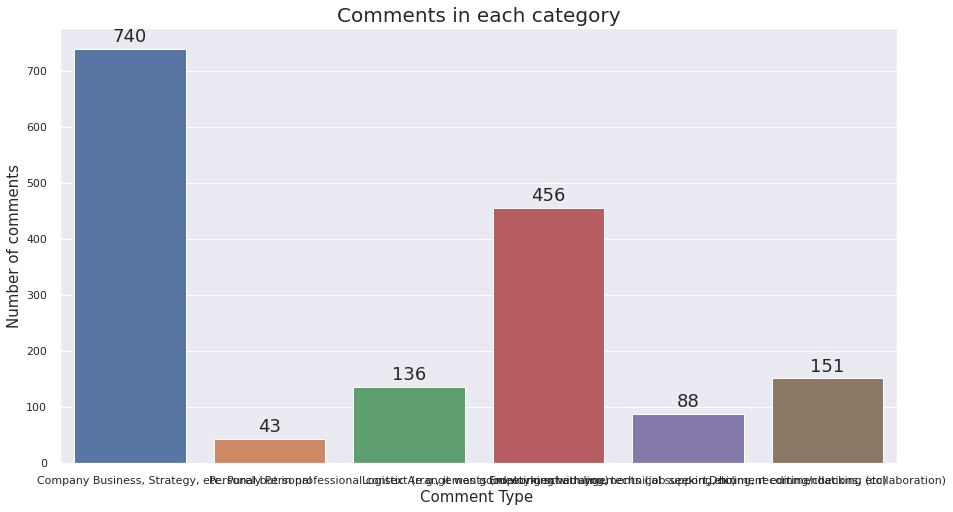

In [ ]:
### lets plot comments in each category
sns.set(font_scale = 1)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, G.iloc[:,0:6].sum().values)

plt.title("Comments in each category", fontsize=20)
plt.ylabel('Number of comments', fontsize=15)
plt.xlabel('Comment Type ', fontsize=15)

#adding the text labels
rects = ax.patches
labels = G.iloc[:,0:6].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


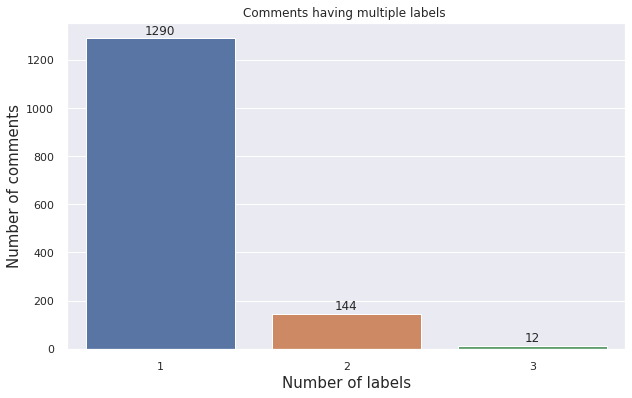

In [ ]:
## lets plot Comments having multiple labels
rowSums = G.iloc[:,0:6].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[0:]

sns.set(font_scale = 1)
plt.figure(figsize=(10,6))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=15)
plt.xlabel('Number of labels', fontsize=15)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

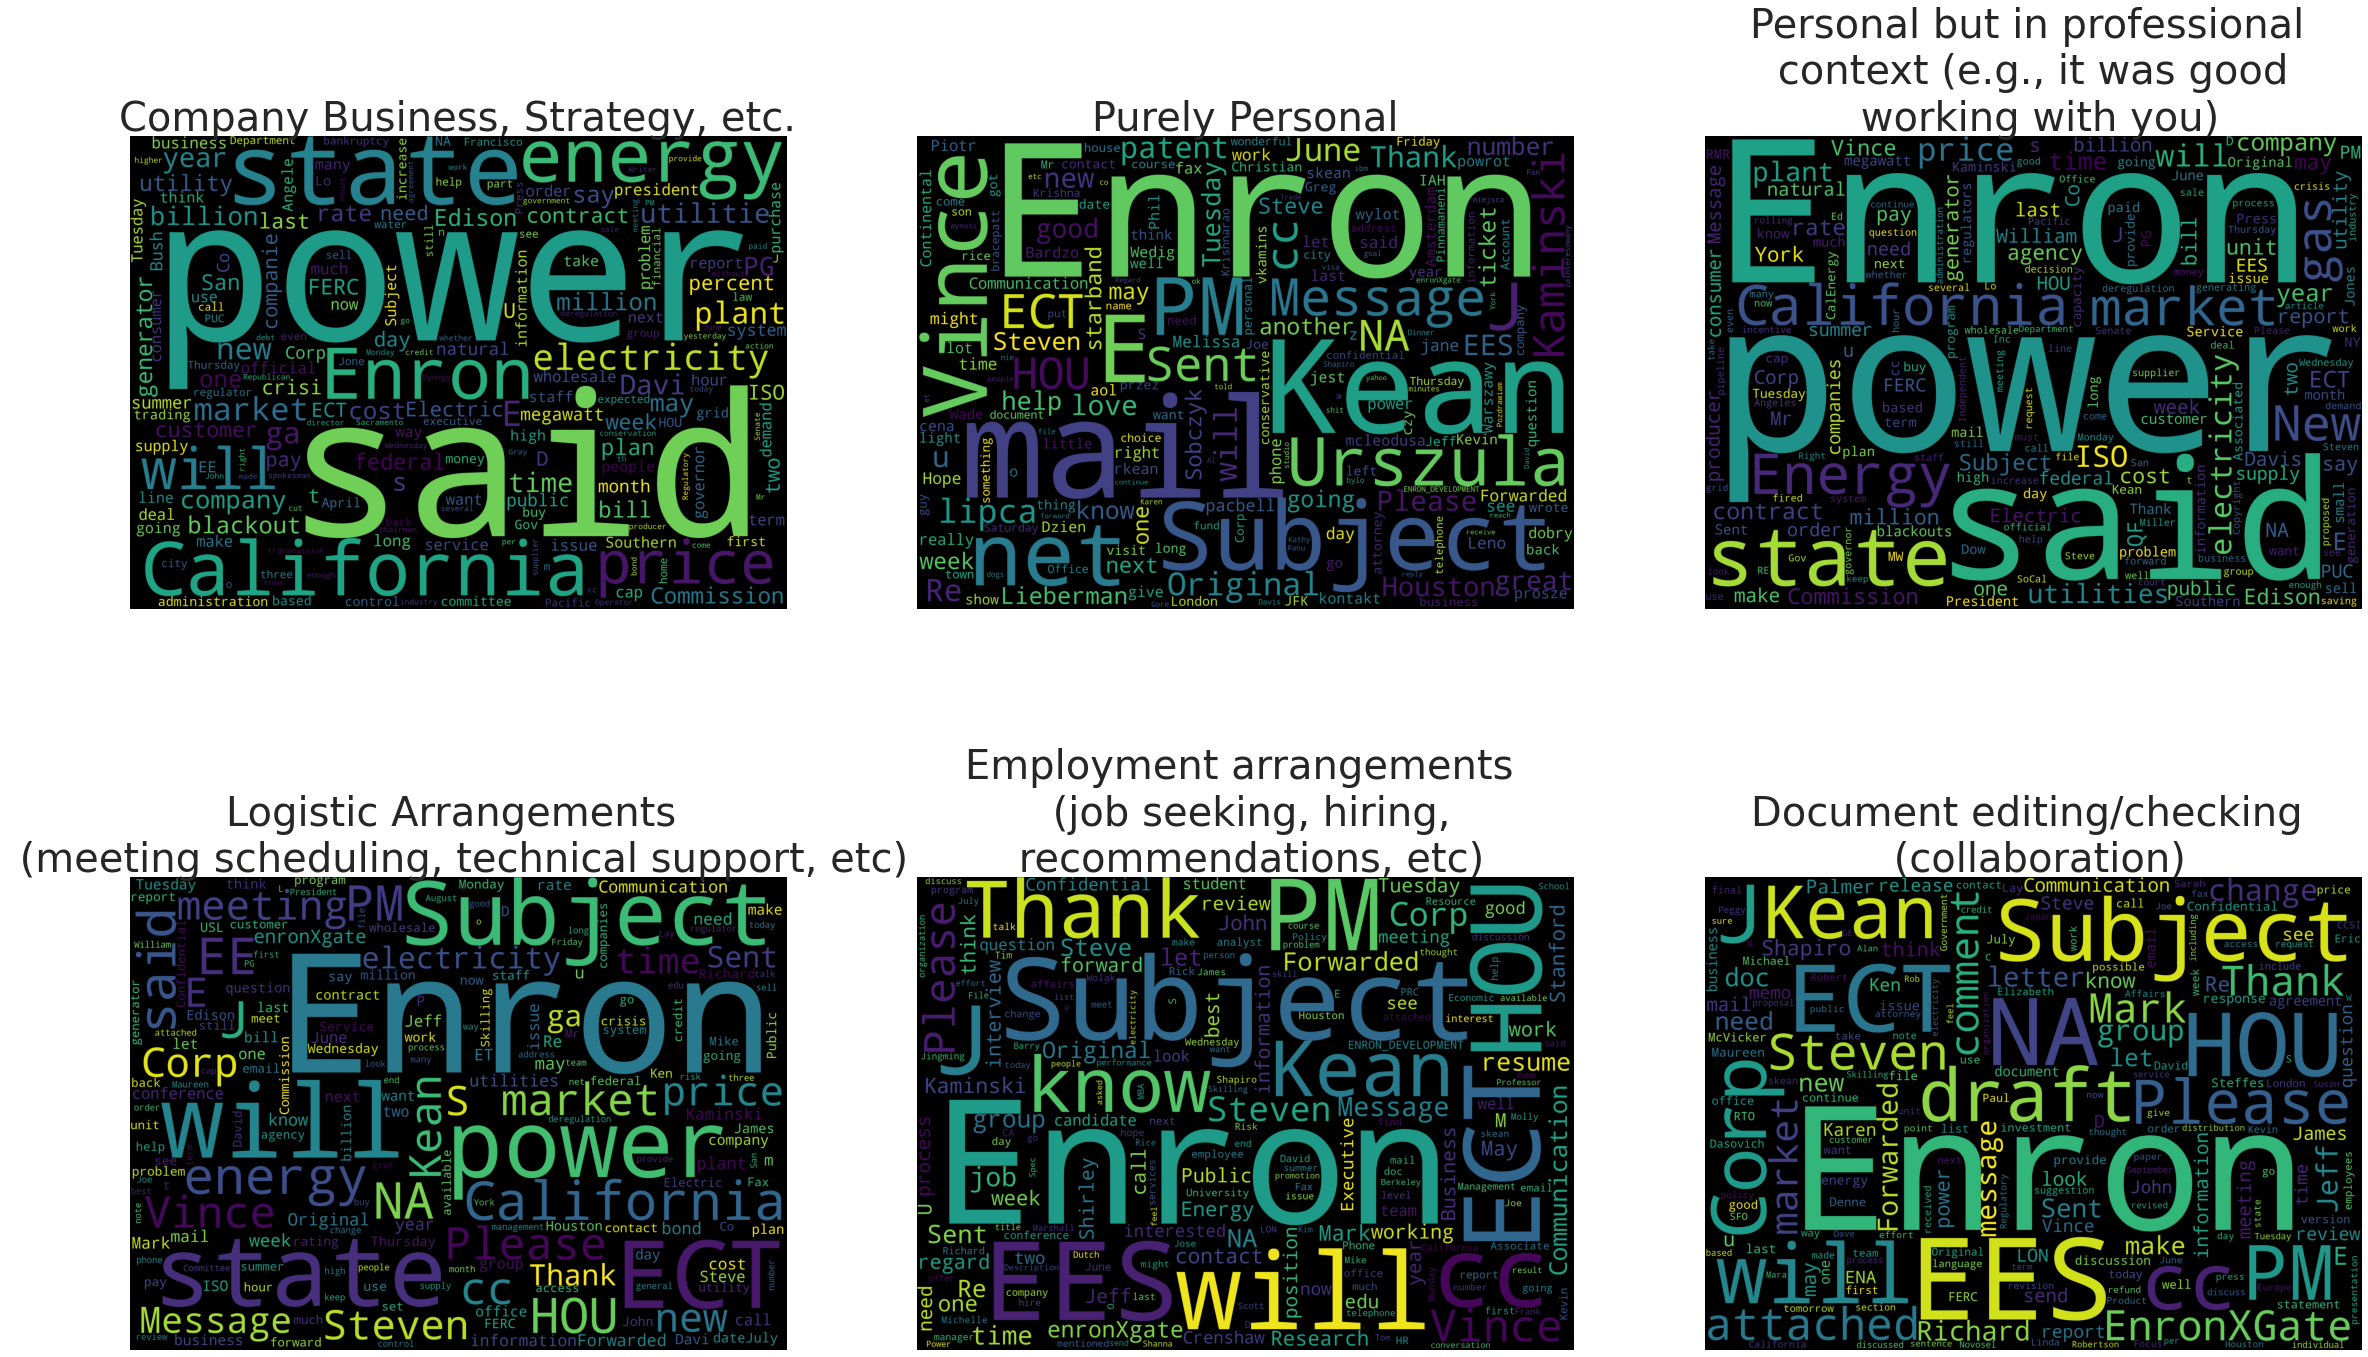

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# Computer Science
subset = G[G['Company Business, Strategy, etc.']==1]
text = subset.content.values
cloud_Company_Business = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Company Business, Strategy, etc.",fontsize=40)
plt.imshow(cloud_Company_Business)


# Physics
subset = G[G['Purely Personal']==1]
text = subset.content.values
cloud_Purely_Personal = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Purely Personal",fontsize=40)
plt.imshow(cloud_Purely_Personal)

# Mathematics
subset = G[G['Personal but in professional context (e.g., it was good working with you)']==1]
text = subset.content.values
cloud_Personal_professional = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Personal but in professional \n context (e.g., it was good \n working with you)",fontsize=40)
plt.imshow(cloud_Personal_professional)


# Statistics
subset = G[G['Logistic Arrangements (meeting scheduling, technical support, etc)']==1]
text = subset.content.values
cloud_Logistic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Logistic Arrangements \n (meeting scheduling, technical support, etc)",fontsize=40)
plt.imshow(cloud_Logistic)

# Quantitative Finance
subset = G[G['Employment arrangements (job seeking, hiring, recommendations, etc)']==1]
text = subset.content.values
cloud_Employment = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Employment arrangements \n (job seeking, hiring,\n recommendations, etc)",fontsize=40)
plt.imshow(cloud_Employment)


# Quantitative Biology
subset = G[G['Document editing/checking (collaboration)']==1]
text = subset.content.values
cloud_Document = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Document editing/checking \n (collaboration)",fontsize=40)
plt.imshow(cloud_Document)

plt.show()
